# Dados dos experimentos

1. [teste_01](./vazao/teste_01_32sp_por_s.txt)
    * 32 dados por segundos

2. [teste_02](./vazao/teste_02_2sp_por_s.txt)
    * 2 dados por segundo

2. [teste_03](./vazao/teste_03_1sp_por_s.txt)
    * 1 dados por segundo

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import os

PATH = os.getcwd()
print(PATH)

os.listdir()

Datatxt = 'teste_03.txt'

data = np.loadtxt(Datatxt)

tempo = data[:, 0]
p0 = data[:, 1]
p0Total = data[:, 2]
p1 = data[:, 3]
p1Total = data[:, 4]
vazao = data[:, 5]
pulsos = data[:, 6]

/home/andre/Documents/Git/ColetaPressao/ColetaPressao/test/analysis/vazao


0.003148809298766726


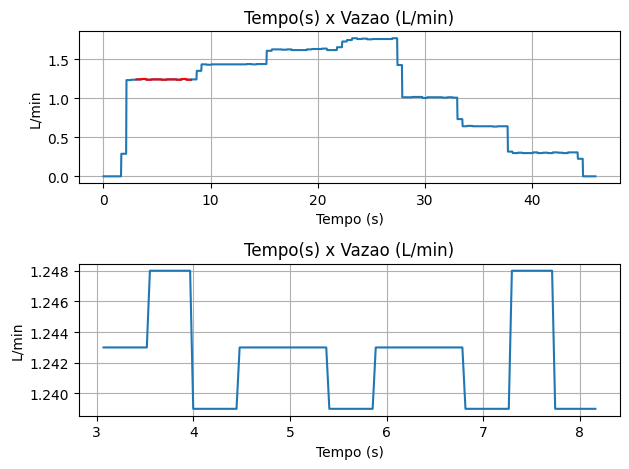

In [105]:
corteBaixo = 32*3
corteAlto = 32*8

print(np.std(vazao[corteBaixo:corteAlto]))

plt.subplot(211)
plt.plot(tempo, vazao)
plt.plot(tempo[corteBaixo:corteAlto], vazao[corteBaixo:corteAlto], color='red')
plt.title("Tempo(s) x Vazao (L/min)")
plt.grid()
plt.xlabel("Tempo (s)")
plt.ylabel("L/min")

plt.subplot(212)
plt.plot(tempo[corteBaixo:corteAlto], vazao[corteBaixo:corteAlto])
plt.title("Tempo(s) x Vazao (L/min)")
plt.grid()
plt.xlabel("Tempo (s)")
plt.ylabel("L/min")

plt.tight_layout()

plt.show()

32.0


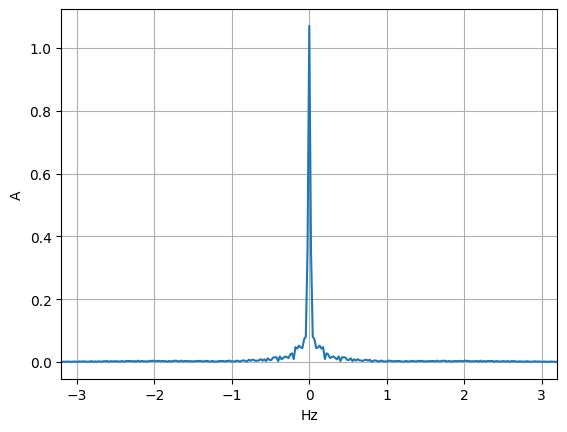

In [106]:
Ts = 1/32
Fs = 1/Ts
print(Fs)

data = vazao

data_fft = fft.fftshift(fft.fft(data))
freqs = np.fft.fftshift(np.fft.fftfreq(len(data_fft), 1/Fs))

plt.plot(freqs, np.abs(data_fft) / len(data_fft))

plt.grid()
plt.xlabel("Hz")
plt.ylabel('A')
plt.xlim(-Fs/10 ,Fs/10)

plt.show()

Coeficientes do Filtro FIR:
[0.0144926  0.03586344 0.09149614 0.1571473  0.20100052 0.20100052
 0.1571473  0.09149614 0.03586344 0.0144926 ]


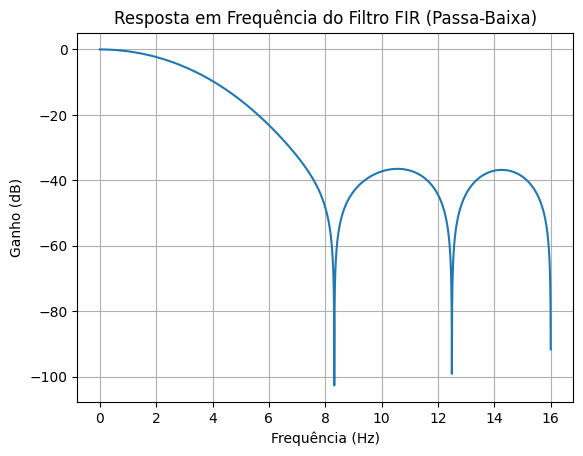

In [107]:
# Especificações do filtro
fs = Fs          # Taxa de amostragem em Hz
fc = 1            # Frequência de corte em Hz
num_taps = 10     # Número de coeficientes (taps)

# Gerar os coeficientes do filtro FIR
coefficients = signal.firwin(num_taps, fc, fs=fs,window = 'hamming', pass_zero='lowpass')

# Exibir os coeficientes
print("Coeficientes do Filtro FIR:")
print(coefficients)

# Visualizar a resposta em frequência
w, h = signal.freqz(coefficients, worN=8000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))

plt.title("Resposta em Frequência do Filtro FIR (Passa-Baixa)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.grid()

plt.show()